# HSE-2024 text classification project

## Table of content
* [Imports](#c1)
* [Data loading](#c2)
* [Split data](#c3)
* [Trainer](#c4)
* [Models training](#c5)

### Imports <a class="anchor" id="c1"></a>

In [1]:
import sys
sys.path.append('..') # to make classes importable

In [2]:
import numpy as np
import pandas as pd
import os
import torch
from sklearn.model_selection import train_test_split

from classes import Preprocessor, MyModel, Trainer
from dicts import *

In [3]:
RANDOM_STATE = 42
torch.manual_seed(RANDOM_STATE)

### Data loading <a class="anchor" id="c2"></a>

In [4]:
base_dir = '../data/'
df = pd.read_csv(os.path.join(base_dir, 'df.csv'), low_memory=False)

### Split data <a class="anchor" id="c3"></a>

In [5]:
ids = df['document.id'].unique()
process_ids, test_ids = train_test_split(ids, test_size=0.2, random_state=RANDOM_STATE)
train_ids, validate_ids = train_test_split(process_ids, train_size=0.75, random_state=RANDOM_STATE)

train = df.loc[df['document.id'].isin(train_ids)]
test = df.loc[df['document.id'].isin(test_ids)]
validate = df.loc[df['document.id'].isin(validate_ids)]
train.shape, test.shape, validate.shape  # percents are ≈ (60%, 20%, 20%)

((47999, 62), (16170, 62), (16281, 62))

In [6]:
preprocessor = Preprocessor.Preprocessor(df=df, args=args, var_vocab=var_vocab, topic_to_russian=topic_to_russian)

### Trainer <a class="anchor" id="c4"></a>

In [7]:
params = {
    'batch_size': [8, 16, 32, 64],
    'lr': [1e-5, 1e-6, 1e-4],
    'max_spoil': range(1, MAX_SPOIL + 1, 1),
    'spoil_proba': np.arange(0.1,  1, 0.1),
    'timer': [0, 1]
}

In [8]:
trainer = Trainer.Trainer(MyModel.MyModel, train, validate, test, preprocessor=preprocessor, 
                          batch_size=16, learning_rate=0.0001, spoil_proba=0.8)

### Bert model training <a class="anchor" id="c5"></a>

In [9]:
# trainer.choose_model() # uncomment to train
# trainer.save()

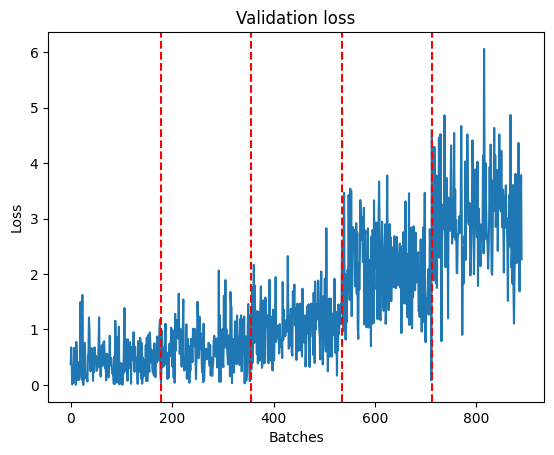

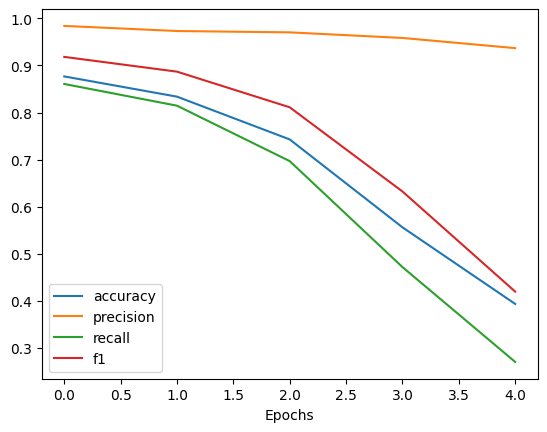

In [10]:
trainer.train(5, save=True)